In [1]:
%matplotlib inline
from pylab import *
import cv2

from dataset import load_image

In [2]:
def mask_overlay(image, mask, color=(0, 255, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0    
    img[ind] = weighted_sum[ind]    
    return img

In [3]:
filenames = [
    '93bc9f101',
    'ca17fa455',
    '004946ceb',
    '93f0f8cf7',
    'ca48b9c02',
    '94081c47b',
    'ca6dff65e',
    '00a3ab3cc',
]

In [6]:
img_file_name = '/home/raznem/proj_kaggle_airbus/data/test_v2/ca17fa455.jpg'
image = load_image(img_file_name)

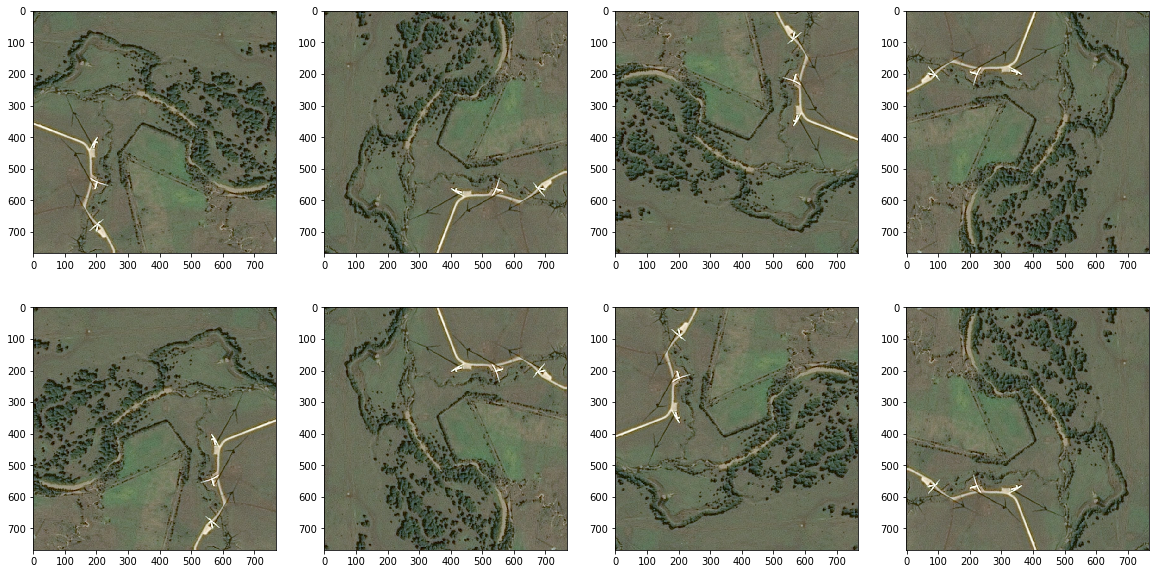

In [23]:
fig = plt.figure(figsize=(20, 10))
    
fig.add_subplot(2, 4, 1)
imshow(image)

fig.add_subplot(2, 4, 2)
imshow(np.rot90(image, k=1))

fig.add_subplot(2, 4, 3)
imshow(np.rot90(image, k=2))

fig.add_subplot(2, 4, 4)
imshow(np.rot90(image, k=3))

image2 = np.fliplr(image) 

fig.add_subplot(2, 4, 5)
imshow(image2)

fig.add_subplot(2, 4, 6)
imshow(np.rot90(image2, k=1))

fig.add_subplot(2, 4, 7)
imshow(np.rot90(image2, k=2))

fig.add_subplot(2, 4, 8)
imshow(np.rot90(image2, k=3))
    
plt.show()

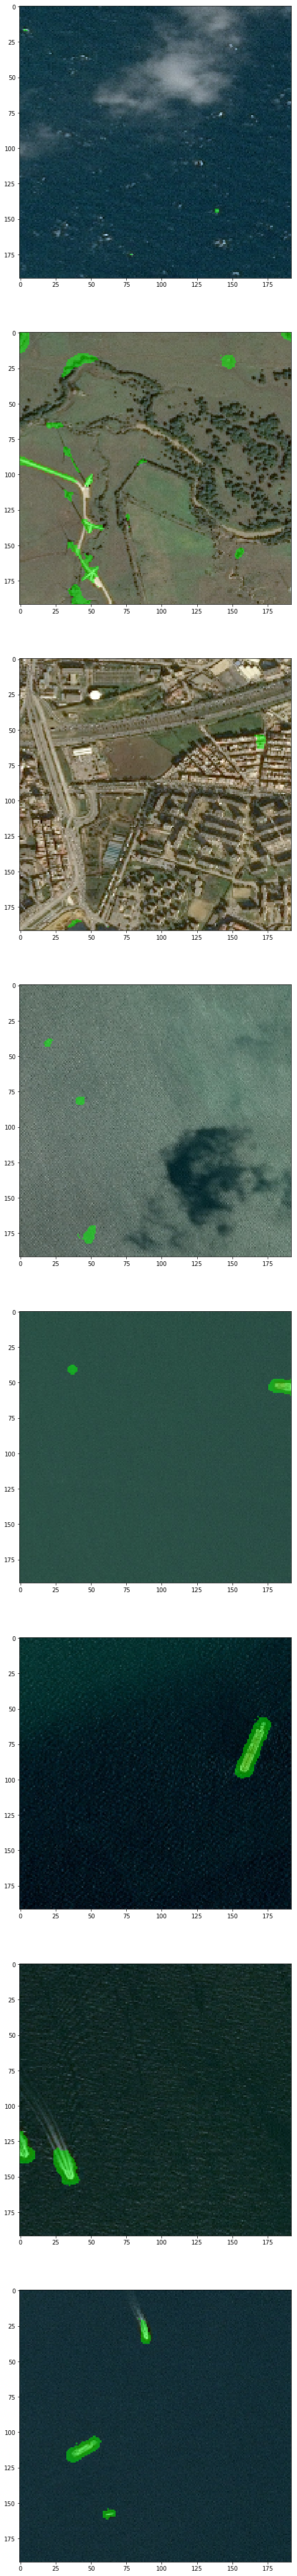

In [10]:
fig = plt.figure(figsize=(10, 80))

for i, img in enumerate(filenames):
    img_file_name = '/home/raznem/proj_kaggle_airbus/data/test_v2/{}.jpg'.format(img)
    gt_file_name = '1/{}.jpg'.format(img)

    image = load_image(img_file_name)
    gt = cv2.imread(gt_file_name, 0) > 0
    
    fig.add_subplot(8, 1, i+1)
    imshow(mask_overlay(image[::4, ::4], gt[::4, ::4]))
    
plt.show()